# __QUICK START__

## 01 |  Instantiating the database

The database can be instantiated using one of the following approaches:

* (a) **Local RDF graph (in-memory)**: Uses a local `rdflib.Graph` as the RDF store.
* (b) **GraphDB-backed RDF store** Uses a local or remote [GraphDB](graphdb.ipynb) instance accessed via RDFLib.

Depending on your availability, we will instantiate it:

In [1]:
from opencefadb import OpenCeFaDB

In [2]:
WORKING_DIR = "local-db"

In [3]:
USE_GRAPH_DB = False
    
if USE_GRAPH_DB:
    db = OpenCeFaDB.from_graphdb_setup(
        working_directory=WORKING_DIR,
        version="latest",
        endpoint="http://localhost:7200",
        repository="OpenCeFaDB-Sandbox",
        username="admin",
        password="admin",
        add_wikidata_store=True
    )
    # NOTE: We assume your GraphDB is already populated. Check Notebook grpahdb.ipynb if you are unsure!
else:
    db = OpenCeFaDB.from_rdflib_setup(
        working_directory=WORKING_DIR,
        version="latest"
    )
    # db.download_metadata()  # only needs to be done once
    for ttl_filename in db.rdf_directory.rglob("*.ttl"):
        db.rdf_store.upload_file(ttl_filename)
    db.add_hdf_infile_index()

 [OpenCeFa DB]: Searching for the latest version...
 [OpenCeFa DB]: downloading version 1.0.0...
 [OpenCeFa DB]: Downloaded latest OpenCeFaDB config file to 'local-db\opencefadb-catalog-1-0-0.ttl'.
 [OpenCeFa DB]: Validating downloaded catalog against SHACL shapes...
 [OpenCeFa DB]: Catalog is valid.
 [OpenCeFa DB]: RDF files are/will be stored in the directory: local-db\opencefadb-1.0.0\rdf
 [OpenCeFa DB]: HDF files are/will be stored in the directory: local-db\opencefadb-1.0.0\hdf
 [OpenCeFa DB]: Checking if metadata files need to be downloaded. If yes, this will take a moment...
 [OpenCeFa DB]: RDF data ready to use.


Uploading HDF5 infile index triples: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11984/11984 [00:00<00:00, 73901.70 triples/s]


# 02 | Perform a metadata query

SPARQL queries can be performed on the RDF Store (`main_rdf_store`). We demonstrate a user-defined query and then one from the pre-defined:

## User-defined metadata query

To formulate a query, use the `SparqlQuery` class:

In [4]:
from h5rdmtoolbox.catalog import SparqlQuery

In [5]:
q = SparqlQuery(
    query="""PREFIX hdf:  <http://purl.allotrope.org/ontologies/hdf5/1.8#>
    PREFIX schema: <https://schema.org/>
    
    SELECT ?hdfFile ?about
    WHERE {
        ?hdfFile a hdf:File ;
            schema:about ?about .
    }
    
    """,
    description="Find all HDF Files"
)

Execute the query on the `rdf_store`

In [6]:
res_hdf_files = q.execute(db.main_rdf_store)

The result object contains the query itself (`res.query`) and the result as pandas dataframe:

We will set the column width of pandas dataframes high, in order to see the full URIs:

In [7]:
import pandas as pd
pd.options.display.max_colwidth = 999

Here is the result data:

In [8]:
res_hdf_files.data.head()

,hdfFile,about
0,https://doi.org/10.5281/zenodo.18349039#2023-11-07-14-03-39_run.hdf,https://www.wikidata.org/wiki/Q131549102
1,https://doi.org/10.5281/zenodo.18349039#2023-11-07-14-03-39_run.hdf,https://www.wikidata.org/wiki/Q101965
2,https://doi.org/10.5281/zenodo.18349039#2023-11-07-14-05-20_run.hdf,https://www.wikidata.org/wiki/Q131549102
3,https://doi.org/10.5281/zenodo.18349039#2023-11-07-14-05-20_run.hdf,https://www.wikidata.org/wiki/Q101965
4,https://doi.org/10.5281/zenodo.18349039#2023-11-07-14-08-28_run.hdf,https://www.wikidata.org/wiki/Q131549102


## Using a sparql template

There are multiple pre-defined templates, some with, some without user input provided through `opencefadb.sparql_templates`:

In [9]:
from opencefadb import sparql_templates

Querying all is not very practical, but let's us find out, how many triples exist in the graph database:

In [10]:
query_all = sparql_templates.SELECT_ALL

res = query_all.execute(db.rdf_store)
len(res.data)

281718

Let's explore more about a certain subject (URI) in our database:

In [11]:
query_properties = sparql_templates.get_properties(
    subject_uri='https://www.wikidata.org/wiki/Q131549102'
)
res = query_properties.execute(db.rdf_store)

In [12]:
res.data

,property,value
0,http://purl.org/dc/terms/hasPart,https://doi.org/10.5281/zenodo.14551649
1,http://w3id.org/nfdi4ing/metadata4ing#hasParameter,https://doi.org/10.5281/zenodo.17871736#rotational_speed
2,http://w3id.org/nfdi4ing/metadata4ing#hasParameter,https://doi.org/10.5281/zenodo.17871736#vol_efficiency
3,http://w3id.org/nfdi4ing/metadata4ing#hasParameter,https://doi.org/10.5281/zenodo.17871736#fan_outlet_area
4,http://w3id.org/nfdi4ing/metadata4ing#hasParameter,https://doi.org/10.5281/zenodo.17871736#tot_efficiency
5,http://w3id.org/nfdi4ing/metadata4ing#hasParameter,https://doi.org/10.5281/zenodo.17871736#blade_shape
6,http://w3id.org/nfdi4ing/metadata4ing#hasParameter,https://doi.org/10.5281/zenodo.17871736#beta_s1
7,http://w3id.org/nfdi4ing/metadata4ing#hasParameter,https://doi.org/10.5281/zenodo.17871736#n_blades
8,http://w3id.org/nfdi4ing/metadata4ing#hasParameter,https://doi.org/10.5281/zenodo.17871736#weight_of_impeller
9,http://w3id.org/nfdi4ing/metadata4ing#hasParameter,https://doi.org/10.5281/zenodo.17871736#D2


---

# 03 | Find operating points and plot a fan curve

Querying a complete fan curve is more involved than retrieving a single value. In practice, it typically requires:

- **Multiple SPARQL queries** to collect the relevant datasets (i.e. operating points), and  
- **Post-processing steps** to join, filter, and reshape the results into a continuous fan curve.

To simplify this workflow, the database provides the convenience method  
`get_operating_point_observations()`, which returns a list of **observations** matching the specified input criteria.

We refer to operating points as *observations* because this reflects the underlying semantic model: operating points are represented using the [SOSA ontology](http://www.w3.org/ns/sosa/) as [`sosa:Observation`](https://www.w3.org/TR/vocab-ssn/#SOSAObservation).

---

## Identifying operating points

In this example, the fan curve is constructed **solely from metadata**, because we work with **mean values** of the measured quantities. Therefore, the relevant datasets are identified using their **standard names** (HDF standard names).

The following standard names are required:

- The standard name for the **mean rotational (revolution) speed**
- The standard names for the **operating-point quantities**, in this case:
  - **Volume flow rate**
  - **Static pressure difference across the fan**

---

## Selecting a valid operating range

In the experiment, the rotational speed is not perfectly constant but varies slightly between measurements. To account for this, we specify a **range of rotational speeds** rather than a single value.

Providing a range is essential—otherwise, no matching operating points may be found.


In [13]:
base = "https://doi.org/10.5281/zenodo.17572275#standard_name_table/"

sn_mean_nrot = base + "derived_standard_name/arithmetic_mean_of_fan_rotational_speed"
sn_mean_dp_stat = base + "derived_standard_name/arithmetic_mean_of_difference_of_static_pressure_between_fan_outlet_and_fan_inlet"
sn_mean_vfr = base + "derived_standard_name/arithmetic_mean_of_fan_volume_flow_rate"

operating_point_standard_names = {
    sn_mean_dp_stat,
    sn_mean_vfr
}

We serach vor **n=600 rpm** and allow variance of 5%:

In [14]:
n_rot = 600
observations = db.get_operating_point_observations(
    n_rot_speed_rpm=n_rot,
    operating_point_standard_names=operating_point_standard_names,
    standard_name_of_rotational_speed=sn_mean_nrot,
    n_rot_tolerance=0.05 # 5 %
)

Processing operating point datasets: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:04<00:00, 10.24 datasets/s]


## Plotting the (semantic) fan curve

In [15]:
from opencefadb.models.fan_curve import SemanticFanCurve

from opencefadb import plotting
import matplotlib.pyplot as plt

In [16]:
fan_curve = SemanticFanCurve.from_observations(
    observations=observations
)

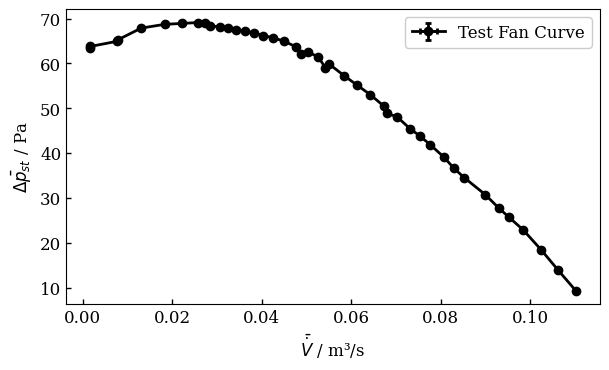

In [17]:
with plotting.SingleAxis(
        scale=1.0,
        filename="test_fan_curve.svg",
) as dax:
    fan_curve.errorbar(
        x="arithmetic_mean_of_fan_volume_flow_rate",
        y="arithmetic_mean_of_difference_of_static_pressure_between_fan_outlet_and_fan_inlet",
        xlabel=None,
        ylabel=None,
        label="Test Fan Curve",
        marker=".",
        linestyle='-',
        ax=dax.ax,
    )
    plt.legend()
    plt.tight_layout()